In [24]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
cwd = os.getcwd()
print(cwd)

C:\Users\Admin\Desktop\Capstone project references\BBC News Summary\Summaries


In [25]:
data_folder = "C:\\Users\\Admin\\Desktop\\Capstone project references\\BBC News Summary\\News Articles"
summary_folder = "C:\\Users\\Admin\\Desktop\\Capstone project references\\BBC News Summary\\Summaries"
folders = ["business","entertainment","politics","sport","tech"]

#Loading Articles and labels
os.chdir(data_folder)

x = []
y = []

for i in folders:
    files = os.listdir(i)
    for text_file in files:
        file_path = i + "/" +text_file
        #print ("reading file:", file_path)
        with open(file_path) as f:
            data = f.readlines()
        data = ' '.join(data)
        x.append(data)
        y.append(i)
   
data = {'news': x, 'type': y}       
story = pd.DataFrame(data)
#print ('writing csv flie ...')
#df.to_csv('../dataset.csv', index=False)

#Loading Article summaries
os.chdir(summary_folder)

x = []
y = []

for i in folders:
    files = os.listdir(i)
    for text_file in files:
        file_path = i + "/" +text_file
        #print ("reading file:", file_path)
        with open(file_path) as f:
            data = f.readlines()
        data = ' '.join(data)
        x.append(data)
        y.append(i)

data2 = {'summaries': x}       
summary = pd.DataFrame(data2)
#print ('writing csv flie ...')
#df.to_csv('../dataset_summary.csv', index=False)

In [26]:
story.describe()

news   type
count                                                2225   2225
unique                                               2127      5
top     Aviator 'creator' in Oscars snub\n \n The man ...  sport
freq                                                    2    511

In [27]:
story.head()

news      type
0  Ad sales boost Time Warner profit\n \n Quarter...  business
1  Dollar gains on Greenspan speech\n \n The doll...  business
2  Yukos unit buyer faces loan claim\n \n The own...  business
3  High fuel prices hit BA's profits\n \n British...  business
4  Pernod takeover talk lifts Domecq\n \n Shares ...  business

In [28]:
summary.describe()

summaries
count                                                2225
unique                                               2081
top     It was the only title to win twice, winning Ul...
freq                                                    2

In [29]:
summary.head()

summaries
0  TimeWarner said fourth quarter sales rose 2% t...
1  The dollar has hit its highest level against t...
2  Yukos' owner Menatep Group says it will ask Ro...
3  Rod Eddington, BA's chief executive, said the ...
4  Pernod has reduced the debt it took on to fund...

In [30]:
final_data=pd.concat([story, summary],axis=1)
final_data.describe()

news   type  \
count                                                2225   2225   
unique                                               2127      5   
top     Aviator 'creator' in Oscars snub\n \n The man ...  sport   
freq                                                    2    511   

                                                summaries  
count                                                2225  
unique                                               2081  
top     It was the only title to win twice, winning Ul...  
freq                                                    2

In [31]:
x = final_data['news'].tolist()
y = final_data['summaries'].tolist()
z=  final_data['type'].tolist()

In [32]:
print(x[1:2])
print(y[1:2])

['Dollar gains on Greenspan speech\n \n The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n \n And Alan Greenspan highlighted the US government\'s willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan\'s speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He\'s taking a longer-term view, laying out a set of conditi

In [33]:
import string
def clean_lines(lines):
	cleaned = list()
	# prepare a translation table to remove punctuation
	table = str.maketrans('', '', string.punctuation)
	for line in lines:
		# tokenize on white space
		line = line.split()
		# convert to lower case
		line = [word.lower() for word in line]
		# remove punctuation from each token
		line = [w.translate(table) for w in line]
		# remove tokens with numbers in them
		line = [word for word in line if word.isalpha()]
		# store as string
		cleaned.append(' '.join(line))
	# remove empty strings
	cleaned = [c for c in cleaned if len(c) > 0]
	return cleaned

In [34]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import Word
import numpy as np

def clean_str(string):
    """
    Tokenization/string cleaning for datasets.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]","", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

In [35]:
from nltk.stem import WordNetLemmatizer
#Cleaning stories
for index,value in enumerate(x):
    #print ("processing data:",index)
    x[index] = ' '.join([word for word in clean_str(value).split()])

#cleaning summaries   
for index,value in enumerate(y):
    #print ("processing data:",index)
    y[index] = ' '.join([ word for word in clean_str(value).split()])

In [36]:
print(x[1:2])
print(y[1:2])

['dollar gains on greenspan speech the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise and alan greenspan highlighted the us government willingness to curb spending and rising household savings as factors which may help to reduce it in late trading in new york the dollar reached against the euro from on thursday market concerns about the deficit has hit the greenback in recent months on friday federal reserve chairman mr greenspan speech in london ahead of the meeting of g finance ministers sent the dollar higher after it had earlier tumbled on the back of worse than expected us jobs data i think the chairman taking a much more sanguine view on the current account deficit than he taken for some time said robert sinche head of currency strategy at bank of america in new york he taking a longer term view laying out a set of conditions under which the current account deficit can improve t

In [37]:
from collections import Counter
from itertools import chain
def get_vocab(lst):
    vocabcount = Counter(w for txt in lst for w in txt.split())
    vocab = list(map(lambda x: x[0], sorted(vocabcount.items(), key=lambda x: -x[1])))
    return vocab, vocabcount

In [38]:
vocab, vocabcount = get_vocab(x+y)

In [39]:
print('Most popular tokens:')
print(vocab[:50])
print('Total vocab size: {:,}'.format(len(vocab)))
type(vocab)

Most popular tokens:
['the', 'to', 'of', 'a', 'and', 'in', 'for', 'is', 'that', 'said', 'it', 'on', 'was', 'he', 'be', 'has', 'with', 'as', 'have', 'at', 'by', 'but', 'will', 'are', 'from', 'mr', 'not', 'i', 'his', 'they', 'would', 'an', 'we', 'this', 'had', 'which', 'been', 'their', 'year', 'more', 'its', 'up', 'were', 'also', 'who', 'people', 'us', 'new', 'one', 'about']
Total vocab size: 28,037


list

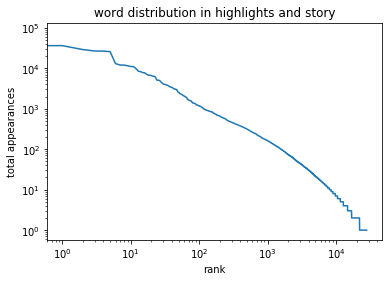

In [40]:
#Zipf's law:the frequency of any word is inversely proportional to its rank in the frequency table. 
#Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word.
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([vocabcount[w] for w in vocab]);
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('word distribution in highlights and story')
plt.xlabel('rank')
plt.ylabel('total appearances');

In [41]:
empty = 0 # RNN mask of no data
eos = 1  # end of sentence
start_idx = eos+1 # first real word

In [42]:
def get_idx(vocab):
    word2idx = dict((word, idx+start_idx) for idx,word in enumerate(vocab))
    word2idx['<empty>'] = empty
    word2idx['<eos>'] = eos
    idx2word = dict((idx,word) for word,idx in word2idx.items())
    return word2idx, idx2word

In [43]:
word2idx, idx2word = get_idx(vocab)

In [44]:
import keras
import zipfile

embedding_dim=100
fname = 'glove.6B.%dd.txt'%embedding_dim
import os
datadir_base = os.path.expanduser(os.path.join('~', '.keras'))
if not os.access(datadir_base, os.W_OK):
    datadir_base = os.path.join('/tmp', '.keras')
datadir = os.path.join(datadir_base, 'datasets')
glove_name = os.path.join(datadir, fname)
if not os.path.exists(glove_name):
    path = 'glove.6B.zip'
    path = keras.utils.get_file(path, origin="http://nlp.stanford.edu/data/glove.6B.zip")
    z = zipfile.ZipFile(path)

Using TensorFlow backend.
C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [45]:
glove_name

'C:\\Users\\Admin\\.keras\\datasets\\glove.6B.100d.txt'

In [46]:
glove_n_symbols = sum(1 for line in open(glove_name,encoding="utf8"))
glove_n_symbols
print('{:,} GloVe symbols'.format(glove_n_symbols))

400,000 GloVe symbols


In [47]:
import numpy as np
glove_index_dict = {}
glove_embedding_weights = np.empty((glove_n_symbols, embedding_dim))
globale_scale = .1
with open(glove_name, 'r',encoding="utf8") as fp:
    i = 0
    for l in fp:
        l = l.strip().split()
        w = l[0]
        glove_index_dict[w] = i
        glove_embedding_weights[i, :] = list(map(float, l[1:]))
        i += 1
glove_embedding_weights *= globale_scale
print('GloVe std dev: {:.4f}'.format(glove_embedding_weights.std()))

GloVe std dev: 0.0408


In [48]:
for w,i in glove_index_dict.items():
    w = w.lower()
    if w not in glove_index_dict:
        glove_index_dict[w] = i

In [49]:
# generate random embedding with same scale as glove
seed=42
vocab_size = 25003
np.random.seed(seed)
shape = (vocab_size, embedding_dim)
scale = glove_embedding_weights.std()*np.sqrt(12)/2 # uniform and not normal
embedding = np.random.uniform(low=-scale, high=scale, size=shape)
print ('random-embedding/glove scale', scale, 'std', embedding.std())

# copy from glove weights of words that appear in our short vocabulary (idx2word)
c = 0
for i in range(vocab_size):
    w = idx2word[i]
    g = glove_index_dict.get(w, glove_index_dict.get(w.lower()))
    if g is None and w.startswith('#'): # glove has no hastags (I think...)
        w = w[1:]
        g = glove_index_dict.get(w, glove_index_dict.get(w.lower()))
    if g is not None:
        embedding[i,:] = glove_embedding_weights[g,:]
        c+=1
print ('number of tokens, in small vocab, found in glove and copied to embedding', c,c/float(vocab_size))

random-embedding/glove scale 0.0706949139514209 std 0.04080538395098852
number of tokens, in small vocab, found in glove and copied to embedding 24184 0.9672439307283126


In [50]:
glove_thr = 0.5

In [51]:
word2glove = {}
for w in word2idx:
    if w in glove_index_dict:
        g = w
    elif w.lower() in glove_index_dict:
        g = w.lower()
    elif w.startswith('#') and w[1:] in glove_index_dict:
        g = w[1:]
    elif w.startswith('#') and w[1:].lower() in glove_index_dict:
        g = w[1:].lower()
    else:
        continue
    word2glove[w] = g

In [52]:
normed_embedding = embedding/np.array([np.sqrt(np.dot(gweight,gweight)) for gweight in embedding])[:,None]

nb_unknown_words = 100

glove_match = []
for w,idx in word2idx.items():
    if idx >= vocab_size-nb_unknown_words and w.isalpha() and w in word2glove:
        gidx = glove_index_dict[word2glove[w]]
        gweight = glove_embedding_weights[gidx,:].copy()
        # find row in embedding that has the highest cos score with gweight
        gweight /= np.sqrt(np.dot(gweight,gweight))
        score = np.dot(normed_embedding[:vocab_size-nb_unknown_words], gweight)
        while True:
            embedding_idx = score.argmax()
            s = score[embedding_idx]
            if s < glove_thr:
                break
            if idx2word[embedding_idx] in word2glove :
                glove_match.append((w, embedding_idx, s)) 
                break
            score[embedding_idx] = -1
glove_match.sort(key = lambda x: -x[2])
print ('# of glove substitutes found', len(glove_match))

# of glove substitutes found 2521


In [53]:
for orig, sub, score in glove_match[-10:]:
    print (score, orig,'=>', idx2word[sub])

0.5017542133003648 segway => moped
0.501565426762595 laurels => trophies
0.5013311113023998 ripper => sherlock
0.5011777351543257 scooby => gangster
0.5008997905831811 debrief => familiarise
0.5007315938353871 beardsley => ollie
0.5007214936690232 soham => ashfield
0.5006085024264704 seuss => poppins
0.5005941767016022 templating => passcode
0.5003347132422398 responsibilty => demonisation


In [54]:
glove_idx2idx = dict((word2idx[w],embedding_idx) for  w, embedding_idx, _ in glove_match)

In [55]:
B=[[word2idx[token] for token in headline.split() ] for headline in (y)]
print(len(B))

2225


In [56]:
word2idx['the'],idx2word[6781]

(2, 'kluft')

In [57]:
B

[[7544,
  11,
  570,
  362,
  173,
  617,
  3,
  26,
  8,
  2,
  391,
  40,
  7544,
  2450,
  5,
  990,
  4,
  43,
  26,
  42,
  473,
  102,
  1679,
  1610,
  3,
  3799,
  616,
  21,
  48,
  306,
  653,
  7544,
  2922,
  3,
  8,
  2,
  97,
  189,
  3,
  317,
  26,
  40,
  342,
  192,
  2,
  121,
  11,
  3168,
  5168,
  990,
  104,
  6516,
  2501,
  617,
  13,
  2,
  94,
  4,
  2134,
  307,
  2054,
  1679,
  42,
  616,
  44,
  8451,
  22,
  50,
  128,
  2645,
  37,
  3716,
  5,
  990,
  3459,
  21,
  3715,
  7164,
  6,
  338,
  229,
  8,
  3168,
  8,
  7544,
  9,
  12784,
  1033,
  1350,
  183,
  4,
  236,
  6,
  45,
  1743,
  588,
  1496,
  6,
  2275,
  990,
  4719,
  12,
  311,
  2562,
  7,
  2,
  570,
  362,
  616,
  44,
  910,
  55,
  7,
  2,
  10501,
  97,
  2563,
  66,
  3715,
  570,
  362,
  616,
  44,
  1800,
  263,
  55,
  359,
  1626],
 [2,
  421,
  17,
  247,
  42,
  1207,
  520,
  81,
  2,
  865,
  7,
  414,
  97,
  189,
  53,
  2,
  1169,
  2305,
  494,
  11,
  2,
  48,
  4

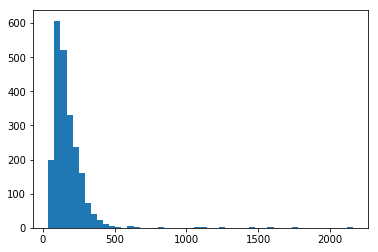

In [58]:
plt.hist(list(map(len,B)),bins=50);

In [59]:
A = [[word2idx[token] for token in d.split()] for d in x]
len(A)

2225

In [60]:
A

[[4495,
  173,
  720,
  66,
  3715,
  990,
  3799,
  616,
  21,
  48,
  306,
  653,
  7544,
  2922,
  3,
  8,
  2,
  97,
  189,
  3,
  317,
  26,
  40,
  342,
  2,
  138,
  37,
  9,
  74,
  50,
  4,
  2,
  301,
  901,
  7,
  864,
  7545,
  26,
  173,
  4,
  160,
  812,
  307,
  1904,
  6,
  588,
  5545,
  173,
  7544,
  11,
  570,
  362,
  173,
  617,
  3,
  26,
  42,
  616,
  44,
  8451,
  22,
  50,
  128,
  2645,
  37,
  3716,
  5,
  990,
  3459,
  21,
  3715,
  7164,
  6,
  338,
  229,
  8,
  3168,
  66,
  3715,
  11,
  13,
  535,
  10,
  12,
  74,
  2053,
  4,
  424,
  1765,
  864,
  23,
  42,
  204,
  307,
  244,
  3168,
  36,
  17,
  3040,
  4263,
  12,
  311,
  2562,
  7,
  2,
  570,
  362,
  616,
  44,
  910,
  55,
  7,
  2,
  10501,
  97,
  2563,
  192,
  2,
  121,
  11,
  3168,
  5168,
  990,
  104,
  6516,
  2501,
  617,
  13,
  2,
  94,
  4,
  2134,
  307,
  2054,
  1679,
  12,
  795,
  3,
  374,
  2562,
  22,
  1168,
  2,
  262,
  194,
  389,
  3,
  7544,
  307,
  609,
  6

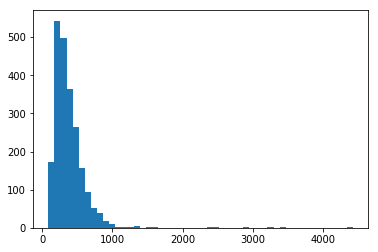

In [61]:
plt.hist(list(map(len,A)),bins=50);

In [62]:
FN = 'vocab-embedding'
import pickle as pickle
with open('%s.pkl'%FN,'wb') as fp:
    pickle.dump((embedding, idx2word, word2idx, glove_idx2idx),fp,-1)

In [63]:
with open('%s.data.pkl'%FN,'wb') as fp:
    pickle.dump((A,B),fp,-1)